## Data & library imports

In [141]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import norm, uniform, shapiro, pearsonr, ttest_ind, mannwhitneyu
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.datasets
import nbformat
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

In [142]:
dataframe = pd.read_csv("dane_projekt1.csv", sep=';')
# we set 'plec' to be 0 or 1 instead of 1 or 2
dataframe['plec'] = dataframe['plec'] - 1

## Ex. 1 Data overview

In [143]:
# print basic info about the data
print(dataframe.describe())

               id        waga      wzrost        plec      dzieci        wiek  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean   155.500000   79.814742  172.726774    0.458065    2.003226   56.241935   
std     89.633513    3.292902    6.906733    0.499044    1.352209    6.746653   
min      1.000000   68.890000  155.670000    0.000000    0.000000   37.000000   
25%     78.250000   77.430000  167.090000    0.000000    1.000000   52.000000   
50%    155.500000   79.890000  172.815000    0.000000    2.000000   56.000000   
75%    232.750000   82.112500  178.032500    1.000000    3.000000   61.000000   
max    310.000000   86.730000  190.790000    1.000000    5.000000   77.000000   

             dochod  oszczednosci     jednoos     miejsce   wydatki_zyw  
count    310.000000    310.000000  310.000000  310.000000    310.000000  
mean    1519.658000    945.994839    0.429032    2.003226     12.383097  
std     1293.464325    787.601212    0.495738   

The data consists of 10 variables, wchih can be separated to two groups 
- qualitative: plec, jednoos, miejsce  
- quantitative: waga, wzrost, dzieci, wiek, dochod, oszczednosci, wydatki_zyw

There is 310 observations in total. The table above shows the basic statistics of the data. All variables are floating point numbers.


In [144]:
# chceck if dataframe is complete
print(dataframe.isnull().sum())

# check if there are any duplicates
print("Duplicates: ", dataframe.duplicated().sum())

# check if variables are correct
print("Negative waga: " + str(dataframe[dataframe['waga'] < 0].shape[0]))
print("Negative wzrost: " + str(dataframe[dataframe['wzrost'] < 0].shape[0]))
print("Negative wiek: " + str(dataframe[dataframe['wiek'] < 0].shape[0]))
print("Negative plec: " + str(dataframe[dataframe['plec'] < 0].shape[0]))
print("Negative dzieci: " + str(dataframe[dataframe['dzieci'] < 0].shape[0]))
print("Negative dochod: " + str(dataframe[dataframe['dochod'] < 0].shape[0]))
print("Negative jednoos: " + str(dataframe[dataframe['jednoos'] < 0].shape[0]))
print("Negative miejsce: " + str(dataframe[dataframe['miejsce'] < 0].shape[0]))
print("Negative wydatki_zyw: " + str(dataframe[dataframe['wydatki_zyw'] < 0].shape[0]))

# check if plec is 0 or 1 only
print("Plec: " + str(dataframe['plec'].unique()))

# check if miejsce is ok
print("Miejsce: " + str(dataframe['miejsce'].unique()))

id              0
waga            0
wzrost          0
plec            0
dzieci          0
wiek            0
dochod          0
oszczednosci    0
jednoos         0
miejsce         0
wydatki_zyw     0
dtype: int64
Duplicates:  0
Negative waga: 0
Negative wzrost: 0
Negative wiek: 0
Negative plec: 0
Negative dzieci: 0
Negative dochod: 0
Negative jednoos: 0
Negative miejsce: 0
Negative wydatki_zyw: 6
Plec: [1 0]
Miejsce: [3 2 1]


Data seems to be correct, although there are some negative values in 'wydatki_zyw' column. We will remove those observations.

In [145]:
mask = dataframe['wydatki_zyw'] < 0
dataframe = dataframe[~mask]
print("Negative wydatki_zyw: " + str(dataframe[dataframe['wydatki_zyw'] < 0].shape[0]))

Negative wydatki_zyw: 0


In [146]:
# make some histograms to visualize the data and see if it is normally distributed
fig = px.histogram(dataframe, x='wiek', title='Histogram of wiek', width=500)
fig_wzrost = px.histogram(dataframe, x='wzrost', title='Histogram of wzrost', width=500)
fig_waga = px.histogram(dataframe, x='waga', title='Histogram of waga', width=500)
fig_dochod = px.histogram(dataframe, x='dochod', title='Histogram of dochod', width=500)
fig_oszczednosci = px.histogram(dataframe, x='oszczednosci', title='Histogram of oszczednosci', width=500)
fig_wydatki_zyw = px.histogram(dataframe, x='wydatki_zyw', title='Histogram of wydatki_zyw', width=500)
fig.show()
# test if the data is normally distributed
print("Shapiro test for wiek: ", shapiro(dataframe['wiek']))
fig_wzrost.show()
print("Shapiro test for wzrost: ", shapiro(dataframe['wzrost']))
fig_waga.show()
print("Shapiro test for waga: ", shapiro(dataframe['waga']))
fig_dochod.show()
print("Shapiro test for dochod: ", shapiro(dataframe['dochod']))
fig_oszczednosci.show()
print("Shapiro test for oszczednosci: ", shapiro(dataframe['oszczednosci']))
fig_wydatki_zyw.show()
print("Shapiro test for wydatki_zyw: ", shapiro(dataframe['wydatki_zyw']))



Shapiro test for wiek:  ShapiroResult(statistic=0.9949513221517189, pvalue=0.42121402853271034)


Shapiro test for wzrost:  ShapiroResult(statistic=0.9892594665139154, pvalue=0.02430922364511628)


Shapiro test for waga:  ShapiroResult(statistic=0.9929033696225562, pvalue=0.15900560659128582)


Shapiro test for dochod:  ShapiroResult(statistic=0.7908118576114409, pvalue=1.8410858979431478e-19)


Shapiro test for oszczednosci:  ShapiroResult(statistic=0.9290091905774026, pvalue=7.38350025459219e-11)


Shapiro test for wydatki_zyw:  ShapiroResult(statistic=0.8780767319751849, pvalue=8.072505039796154e-15)


wiek, wzrost and waga seem to be normally distributed, while dochod, oszczednosci and wydatki_zyw are not

In [147]:
# perform a log transformation on the data and check if it is normally distributed
dochod_log = np.log(dataframe['dochod'])
oszczednosci_log = np.log(dataframe['oszczednosci'])
wydatki_zyw_log = np.log(dataframe['wydatki_zyw'])

fig_dochod_log = px.histogram(dochod_log, title='Histogram of log(dochod)', width=500)
fig_oszczednosci_log = px.histogram(oszczednosci_log, title='Histogram of log(oszczednosci)', width=500)
fig_wydatki_zyw_log = px.histogram(wydatki_zyw_log, title='Histogram of log(wydatki_zyw)', width=500)
fig_dochod_log.show()
print("Shapiro test for log(dochod): ", shapiro(dochod_log))
fig_oszczednosci_log.show()
oszczednosci_log.dropna(inplace=True)
print("Shapiro test for log(oszczednosci): ", shapiro(oszczednosci_log))
fig_wydatki_zyw_log.show()
print("Shapiro test for log(wydatki_zyw): ", shapiro(wydatki_zyw_log))
oszczednosci_log.dropna(inplace=True)

/home/students/inf/m/mn448378/WUM/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



Shapiro test for log(dochod):  ShapiroResult(statistic=0.9398826029898336, pvalue=8.869362249093608e-10)


Shapiro test for log(oszczednosci):  ShapiroResult(statistic=0.9162522199780686, pvalue=1.109245030640908e-11)


Shapiro test for log(wydatki_zyw):  ShapiroResult(statistic=0.7856104980025094, pvalue=1.0901628513233297e-19)


log transformed variables are still not normal

### QQ plots for variables

Q-Q plot for wiek: 


/tmp/ipykernel_2243593/1600292354.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



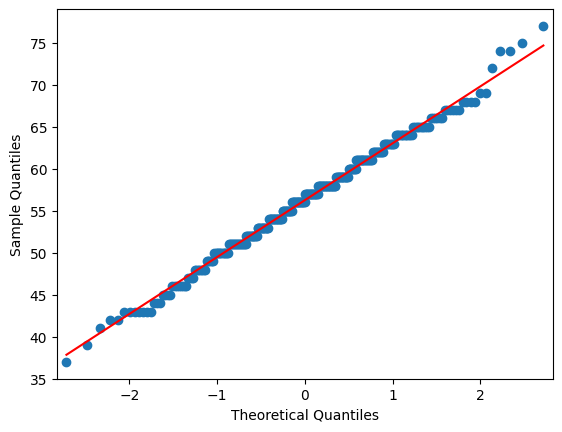

In [148]:
print("Q-Q plot for wiek: ")    
qqplot(dataframe['wiek'], line='s').show()


Q-Q plot for wzrost: 


/tmp/ipykernel_2243593/1659871181.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



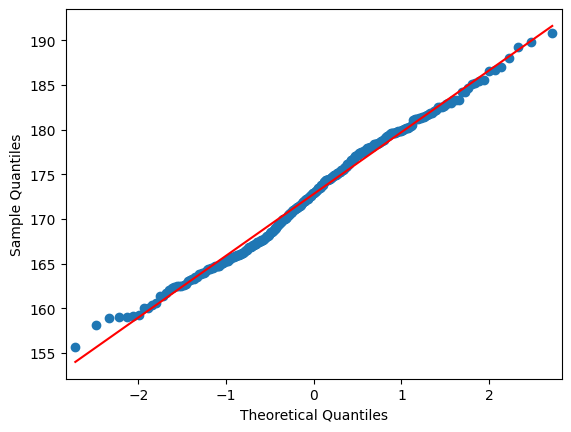

In [149]:
print("Q-Q plot for wzrost: ")
qqplot(dataframe['wzrost'], line='s').show()

Q-Q plot for waga: 


/tmp/ipykernel_2243593/1331535281.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



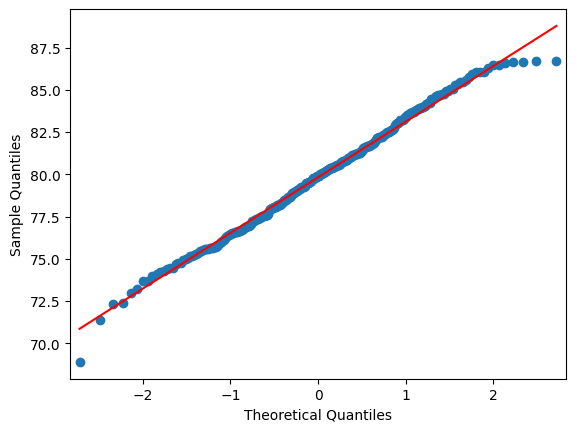

In [150]:
print("Q-Q plot for waga: ")
qqplot(dataframe['waga'], line='s').show()

Q-Q plot for dochod: 


/tmp/ipykernel_2243593/2121486966.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



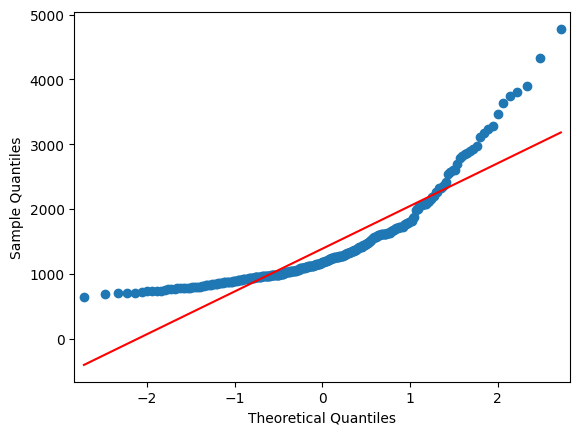

In [151]:
print("Q-Q plot for dochod: ")
qqplot(dataframe['dochod'], line='s').show()

Q-Q plot for oszczednosci: 


/tmp/ipykernel_2243593/1111187322.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



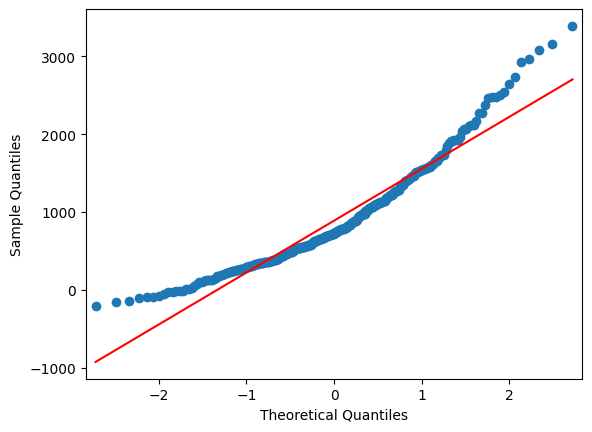

In [152]:
print("Q-Q plot for oszczednosci: ")
qqplot(dataframe['oszczednosci'], line='s').show()


Q-Q plot for wydatki_zyw: 


/tmp/ipykernel_2243593/2192178755.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



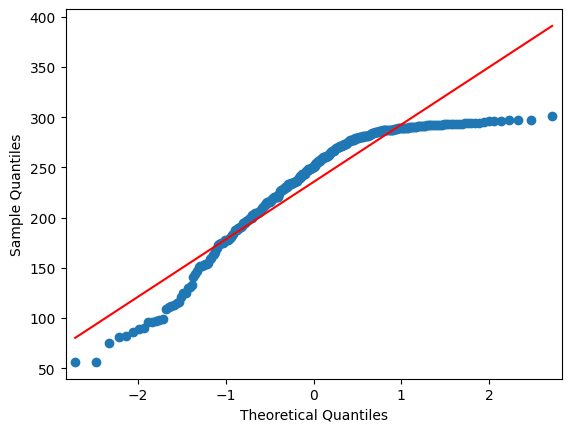

In [153]:
print("Q-Q plot for wydatki_zyw: ")
qqplot(dataframe['wydatki_zyw'], line='s').show()

Q-Q plots confirm our initial guess that wzrost, wiek and waga are normally distributed.

## Ex. 2

In [154]:
px.scatter_matrix(dataframe, dimensions=['wiek', 'wzrost', 'waga', 'dochod', 'oszczednosci', 'wydatki_zyw', 'jednoos', 'dzieci', 'miejsce'], height=1500).show()

Looking at scatter matrix we can see that there is a strong correlation between 'dochod' and 'oszczednosci'.

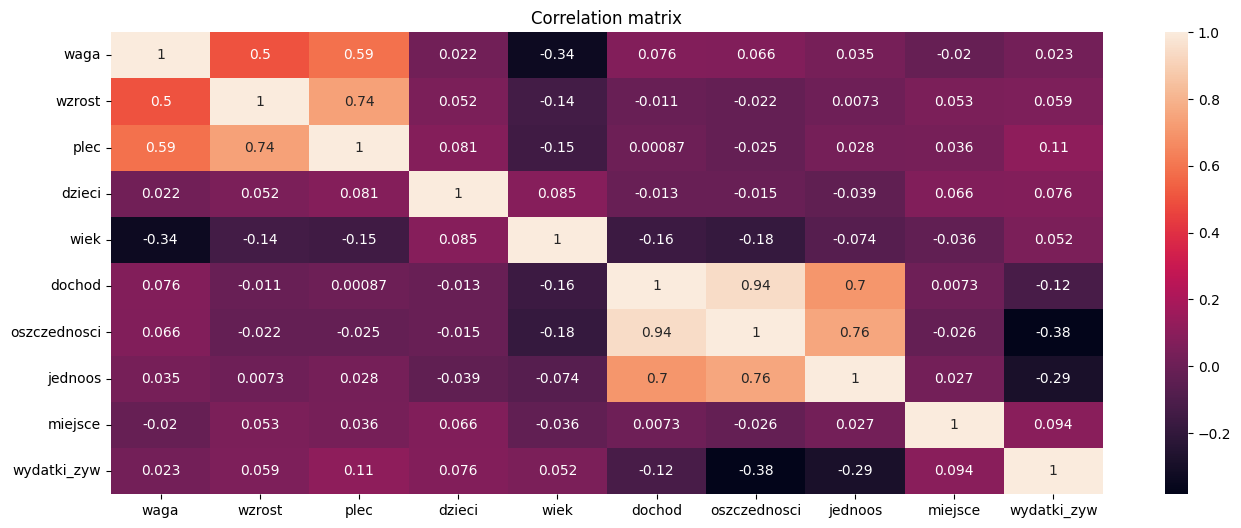

In [155]:

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataframe.drop(columns=['id']).corr(method='pearson'), annot=True).set_title('Correlation matrix');

The biggest pearson correlation coefficient is between 'dochod' and 'Oszczednosci' which equals 0.94. It is a very strong positive correlation, but we have to remeber that pearson test assumes normal distribution. 'dochod' and 'oszczednosci' are not normally distributed. The second biggest correlation is between 'oszczednosci' and 'jednoos', we can also observe a correlation between 'plec' and 'wzrost'.

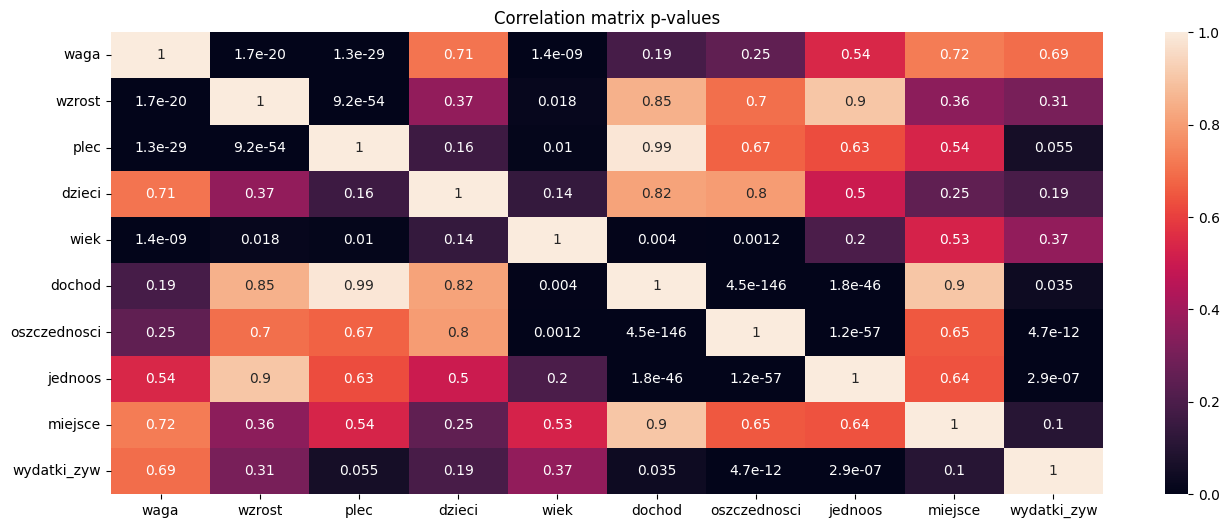

In [156]:

plt.figure(figsize=(16, 6))

def pearson_p_value(x, y):
    return pearsonr(x, y)[1]


heatmap_p_values = sns.heatmap(dataframe.drop(columns=['id']).corr(method=pearson_p_value), annot=True).set_title('Correlation matrix p-values');

Calculated p-values tell us if given correlation coefficient is statistically significant 'dochod'~'oszczednosci' has a very low p-value so we can reject null hypothesis about no correlation

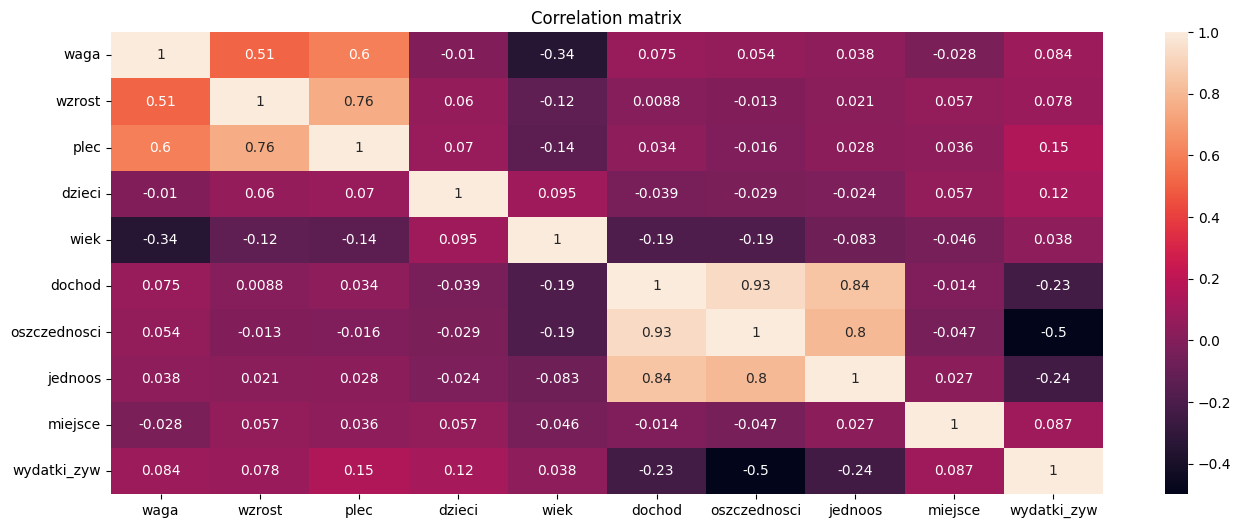

In [157]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataframe.drop(columns=['id']).corr(method='spearman'), annot=True).set_title('Correlation matrix');

After performing spearman correlation we can see that strong correlation between 'dochod' and 'oszczednosci' still holds. Speraman correlation doesn't assume linear normal distribution of the data, so it is more reliable in this case.

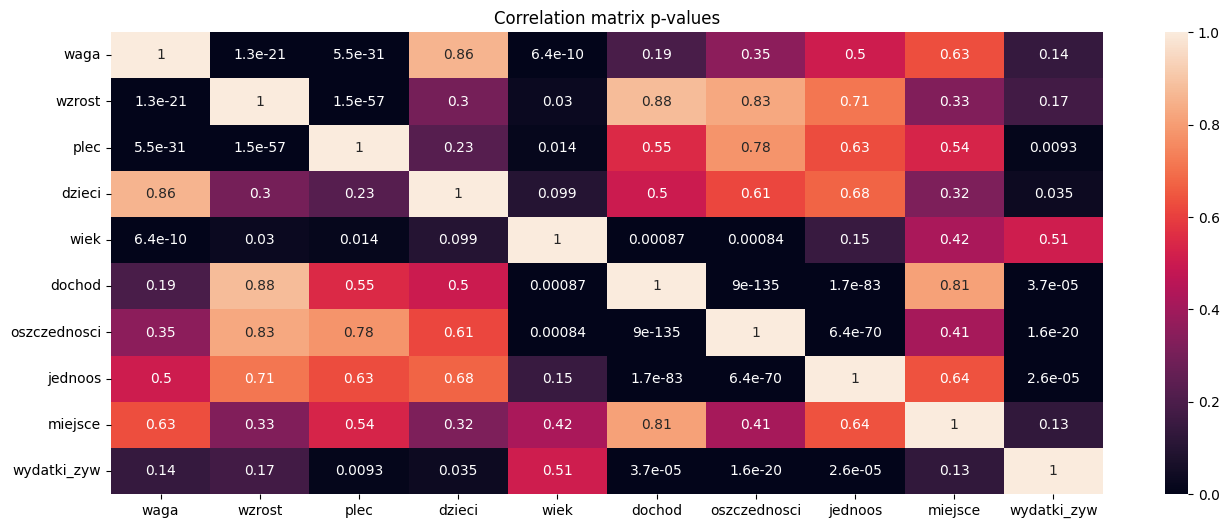

In [158]:
plt.figure(figsize=(16, 6))

def pearson_p_value(x, y):
    return spearmanr(x, y)[1]


heatmap_p_values = sns.heatmap(dataframe.drop(columns=['id']).corr(method=pearson_p_value), annot=True).set_title('Correlation matrix p-values');

low p-values tell us about statistical importance of correlation between 'dochod' and 'oszczednosci'

## Ex. 3

In [159]:
waga = px.scatter(dataframe, x='wydatki_zyw', y='waga', trendline='lowess')
wzrost = px.scatter(dataframe, x='wydatki_zyw', y='wzrost', trendline='lowess')
dzieci = px.scatter(dataframe, x='wydatki_zyw', y='dzieci', trendline='lowess')
wiek = px.scatter(dataframe, x='wydatki_zyw', y='wiek', trendline='lowess')
dochod = px.scatter(dataframe, x='wydatki_zyw', y='dochod', trendline='lowess')
oszczednosci = px.scatter(dataframe, x='wydatki_zyw', y='oszczednosci', trendline='lowess')
waga.show()
wzrost.show()
dzieci.show()
wiek.show()
dochod.show()
oszczednosci.show()


Above plots present the relationship between wydatki_zyw and other variables. 
The relationship is the strongest between wydatki_zyw and oszczednosci and dochod, but as the wydatki_zyw increases variance grows. Plots are provided with Local regression trendline for smooth visualization of the relationships.

In [160]:
px.box(dataframe, x='miejsce', y='dochod', title='Boxplot of dochod for miejsce',color='plec', points='all', notched=True, height=800).show()

From these boxplots we can see that dochod is rather independent of miejsce, but there are some outliers in the data. We can also see that in the biggest cities women earn less than men.

In [161]:
df2 = dataframe.groupby(['jednoos', 'plec']).count().reset_index()
df2 = df2.rename(columns={'waga': 'count'})
px.bar(df2, x='plec',y='count', color='jednoos', title='Barplot of jednoos for plec', barmode='group', height=500).show()

The chart shows that the percentage of 'jednoos' is slightly higher among men (43.3%) than among women (40.5%).

## Ex. 4

In [162]:
mean = dataframe['wiek'].mean()
std = dataframe['wiek'].std()
variance = np.var(dataframe['wiek'])
quartile1, quartile2, quartile3 = np.percentile(dataframe['wiek'], [25, 50, 75])
alpha = 0.01
n = dataframe['wiek'].count()
z = norm.ppf(1-alpha/2)
margin_error = z * std / np.sqrt(n)
print("Mean: ", mean)
l_confidence_interval = mean - margin_error
r_confidence_interval = mean + margin_error
print("Confidence interval: ", l_confidence_interval, r_confidence_interval)

Mean:  56.25986842105263
Confidence interval:  55.25787116549437 57.26186567661089


The assumption is that wiek comes from the normal distribution, we could use t-student distribution to calculate confidence intervals, but as n > 300 there is no need for that. This assumption goes well with the real data, which we checked on QQplot.

## Ex. 5

In [163]:
# compute quantiles for dochod
quantile25, quantile75, quantile90 = np.percentile(dataframe['dochod'], [25, 75, 90])
# divide the data into 4 groups based on quantiles
lowr_wyd_zyw = dataframe[dataframe['dochod'] < quantile25]['wydatki_zyw'].reset_index(drop=True)
medium_wyd_zyw = dataframe[(dataframe['dochod'] >= quantile25) & (dataframe['dochod'] < quantile75)]['wydatki_zyw']
medium_high_wyd_zyw = dataframe[(dataframe['dochod'] >= quantile75) & (dataframe['dochod'] < quantile90)]['wydatki_zyw']
high_wyd_zyw = dataframe[dataframe['dochod'] >= quantile90]['wydatki_zyw']
# create a boxplots of wydatki_zyw for each group
df2 = pd.DataFrame({'lowr_wyd_zyw': lowr_wyd_zyw, 'medium_wyd_zyw': medium_wyd_zyw, 'medium_high_wyd_zyw': medium_high_wyd_zyw, 'high_wyd_zyw': high_wyd_zyw})
px.box(df2, title='Boxplot of wydatki_zyw for dochod', points='all', height=800).show()

On the boxplot we can see a clear difference between the groups. In each of the groups, the mean value of the variable is different. Points 
seem to be cumulated in the upper part of the boxplot, which may indicate that the distribution of the variable is left-skewed.

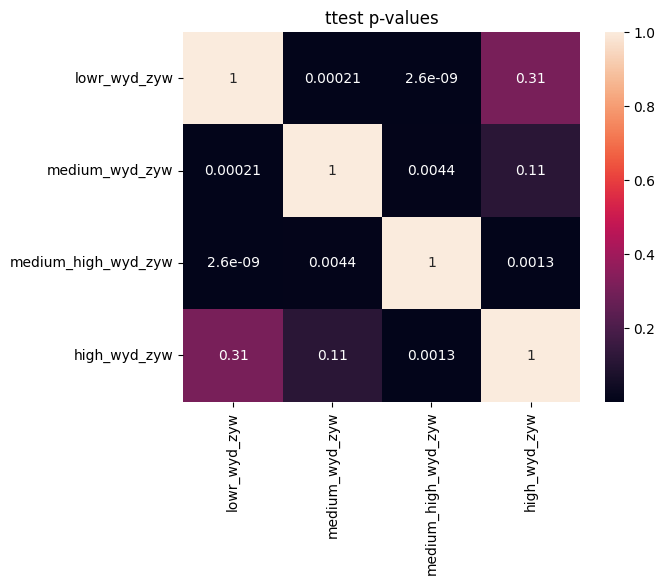

In [164]:
cross_ttest_wyd_zyw = np.zeros((4, 4))
wyd_zyw = [lowr_wyd_zyw, medium_wyd_zyw, medium_high_wyd_zyw, high_wyd_zyw]
for i in range(4):
    for j in range(4):
        cross_ttest_wyd_zyw[i][j] = ttest_ind(wyd_zyw[i], wyd_zyw[j])[1]

cross_ttest_wyd_zyw = pd.DataFrame(cross_ttest_wyd_zyw, columns=['lowr_wyd_zyw', 'medium_wyd_zyw', 'medium_high_wyd_zyw', 'high_wyd_zyw'], index=['lowr_wyd_zyw', 'medium_wyd_zyw', 'medium_high_wyd_zyw', 'high_wyd_zyw'])
heatmap_p_values = sns.heatmap(cross_ttest_wyd_zyw, annot=True).set_title('ttest p-values');

On above chart we can see p-values for t-test for different groups of wydatki_zyw for dochod. We can see that in most cases p-values are very low, so we can reject null hypothesis that means are equal.

## Ex. 6

In [165]:
px.box(dataframe, x='plec', y='oszczednosci', title='Boxplot of dochod for plec (0 is woman)', points='all', notched=True, height=800, color='plec').show()
print(ttest_ind(dataframe[dataframe['plec'] == 0]['oszczednosci'], dataframe[dataframe['plec'] == 1]['oszczednosci']))

TtestResult(statistic=0.4279557413869727, pvalue=0.6689883649475534, df=302.0)


In [166]:
# with mannwhitneu check if women have more savings
mannwhitneyu(dataframe[dataframe['plec'] == 0]['oszczednosci'], dataframe[dataframe['plec'] == 1]['oszczednosci'], alternative='greater')

MannwhitneyuResult(statistic=11708.0, pvalue=0.3887370161711446)

Assuming $\alpha = 0.01$ we can't reject null hypothesis that women have less or egual savings like men. I choosed mannwhitneyu test because all observations are independent and for each 2 observations, we can say which is greater.

In [167]:
dataframe2 = dataframe.copy(deep=True)
dataframe2['wydzyw_to_dochod'] = dataframe2['wydatki_zyw'] / dataframe2['dochod']
px.scatter(dataframe2, x='oszczednosci', y='wydzyw_to_dochod', trendline='lowess').show()

In [168]:
# null hypothesis = no correlation
# alternative hypothesis = correlation
from scipy.stats import spearmanr
print("Spearman correlation: ", spearmanr(dataframe2['oszczednosci'], dataframe2['wydzyw_to_dochod']))
print("With p-value:", spearmanr(dataframe2['oszczednosci'], dataframe2['wydzyw_to_dochod'])[1])
# wilk for normality 
print("Wilk test for normality: ", shapiro(dataframe2['wydzyw_to_dochod']))
print("Wilk test for normality: ", shapiro(dataframe2['oszczednosci']))


Spearman correlation:  SignificanceResult(statistic=-0.9726091116445553, pvalue=2.0103756749114015e-193)
With p-value: 2.0103756749114015e-193
Wilk test for normality:  ShapiroResult(statistic=0.9765078132353942, pvalue=6.942035524891418e-05)
Wilk test for normality:  ShapiroResult(statistic=0.9290091905774026, pvalue=7.38350025459219e-11)


Looking at the graph and at the results of statistical test we can see that there is a correlation between savings and the ratio of food expenses to income, the null hypothesis for spearman test was there is no correlation between tested variables. The correlation is negative, which means that the more savings the person has, the lower the ratio of food expenses to income. The correlation is statistically significant. I choosed spearmanr test because it doesn't assume normal distribution, in this case this is important because we don't have normal distribution

In [169]:
# Calculate the mean
mean_waga = dataframe[dataframe['plec'] == 0]['waga'].mean()

histo = px.histogram(dataframe[dataframe['plec'] == 0]['waga'], title='Histogram of waga for plec = 0', height=500)
histo.add_vline(x=56, line_dash='dash', annotation_text='Specific Value', annotation_position='top right')
histo.add_vline(x= mean_waga , line_dash='solid', annotation_text='Mean', annotation_position='top right')
histo.show()
# check if mean 'waga' for 'plec' = 0 is higher than 56
# null hypothesis = mean is equal or greater than 56
# alternative hypothesis = mean is less than 56
ttest_ind(dataframe[dataframe['plec'] == 0]['waga'], 56, alternative='less')

TtestResult(statistic=8.35753219139226, pvalue=0.9999999999999862, df=162.0)

we can't reject the null hypothesis that the mean 'waga' for 'plec' = 0 is higher than 56.  I used a t-test to compare the mean of the data set because we can assume that the 'waga' has a normal distribution

In [170]:
# perform chi2 test for 'dzieci' to check if it comes form Poisson distribution
from scipy.stats import chisquare
lambda_ = dataframe['dzieci'].mean()
count = dataframe['dzieci'].count()
expected = np.array([(np.exp(-lambda_) * lambda_**i / np.math.factorial(i)) * count for i in range(dataframe['dzieci'].max() + 1)])
observed = dataframe['dzieci'].value_counts().sort_index().values
differece = expected.sum() - observed.sum()
expected[-1] -= differece # we need to adjust the last value, because sum of expected values must be equal to sum of observed values
# px.histogram(expected, title='Histogram of dzieci', height=800).show()
px.bar(x=np.arange(len(observed)), y=observed, title='Barplot of observed dzieci', height=800).show()
chisquare(observed, expected)


/tmp/ipykernel_2243593/220045800.py:5: DeprecationWarning:

`np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`



Power_divergenceResult(statistic=4.807530878998303, pvalue=0.4398182333394369)

Based on $\chi ^ 2$ test for proportions we can't reject null hypothesis that 'dzieci' comes from Poisson's distribution. I used $\chi ^ 2$ because dzieci comes from discrete distribution and observations are independent 

## Ex. 7

In [171]:
# let X be only columns 'dochod' and 'oszczednosci;
alpha = 0.01
X = dataframe.drop(columns=['wydatki_zyw', 'id'])
# make dummy variables for 'miejsce'
X = pd.get_dummies(X, drop_first=True, columns=['miejsce'])
X['miejsce_2'] = X['miejsce_2'].astype(int)
X['miejsce_3'] = X['miejsce_3'].astype(int)
X = sm.add_constant(X)
model = sm.OLS(dataframe['wydatki_zyw'], X)
result = model.fit()
result.summary()
# X

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.51e-66
Time:                        21:45:54   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          226.2224     90.953      2.487      0.013      47.219     405.225
waga            -0.4266      0.755     -0.565      0.572      -1.912       1.059
wzrost          -0.0961      0.410     -0.235      0.815      -0.903       0.710
plec             6.8792      6.148      1.119      0.264      -5.220      18.978
dzieci           3.1627      1.433      2.207      0.028       0.342       5.983
wiek            -0.4059      0.307     -1.324      0.186      -1.009       0.197
dochod           0.1878      0.009     21.572      0.000       0.171       0.205
oszczednosci    -0.2120      0.009    -22.336      0.000      -0.231      -0.193
jednoos          7.2584      5.970      1.216      0.225      -4.492      19.009
miejsce_2       -5.4212      4.655     -1.164      0.245     -14.584       3.741
miejsce_3        0.5035      5.200      0.097      0.923      -9.730      10.737
==============================================================================
Omnibus:                      223.700   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3842.367
Skew:                          -2.805   Prob(JB):                         0.00
Kurtosis:                      19.489   Cond. No.                     9.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the p values we might suspect that most of our predictors have no statistical signifficance, but F value is quite large, signaling that some of the predictors are important. $R^2$ suggests that our model doesn't provide the best fit, which can be seen in the chart below.

In [172]:
standarized_residuals = result.resid / np.std(result.resid)
px.histogram(standarized_residuals, title='Histogram of standarized residuals', height=800, nbins=50).show()
print(shapiro(standarized_residuals))

ShapiroResult(statistic=0.803400857587963, pvalue=6.820837761762489e-19)


After a quick look at the histogram and Wilk test we can reject null hypothesis that residuals are normally distributed

In [173]:
print(sm.stats.diagnostic.linear_reset(result, power=3, test_type='fitted'))

<Wald test (chi2): statistic=654.8932342874361, p-value=6.190718500969643e-143, df_denom=2>


Ramsey RESET test enables us to reject $H_0 : X \beta + \epsilon$

In [174]:
fitted_values = result.fittedvalues
residuals = result.resid
px.scatter(y=residuals, x=fitted_values, trendline='ols', title="Residuals vs. fitted values").show()

We can forget about linear relationship

In [175]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(standarized_residuals))
px.scatter(y=model_norm_residuals_abs_sqrt, x=fitted_values, title="Scale-Location", trendline='lowess', trendline_color_override="red").show()


Our lowess trendline isn't straight at all so data isn't homoscadastic. From the sinusoidal look of the trendline, we can infer the possibility of autocorelation

In [176]:
indexes = np.linspace(1, len(standarized_residuals), len(standarized_residuals))
indexes = indexes.astype(int)
px.line(x=indexes, y=standarized_residuals, title='Standardized residuals over the observation number').add_hline(y=0, line_dash='dash', line_color='red')

Judging from the line plot of the standardized residuals, we can't say that data isn't homoscadastic, but we can see that there are 2 outliers. So acording to the LINE rule:
1. Trend in the data isn't linear.
2. We can't reject hypothesis that residuals are correlated
3. Residuals aren't  noramally distributed.
4. Data isn't homoscedastic.

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X2 = X.drop(columns=['const']) # definition of R^2 changes if we remove const. With const r2 follows standard definition with mean, without const 'mean' = 0.
X2 = X
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif_data)

         feature          VIF
0          const  2310.884983
1           waga     1.731495
2         wzrost     2.248774
3           plec     2.625501
4         dzieci     1.028401
5           wiek     1.203732
6         dochod     9.216374
7   oszczednosci    11.222733
8        jednoos     2.422016
9      miejsce_2     1.500755
10     miejsce_3     1.499050


Income and savings show high VIF values, which means they are correlated, probably with each other, as was also encountered in the matrix scatter plot at the beginning of this notebook.

/tmp/ipykernel_2243593/3951251135.py:1: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



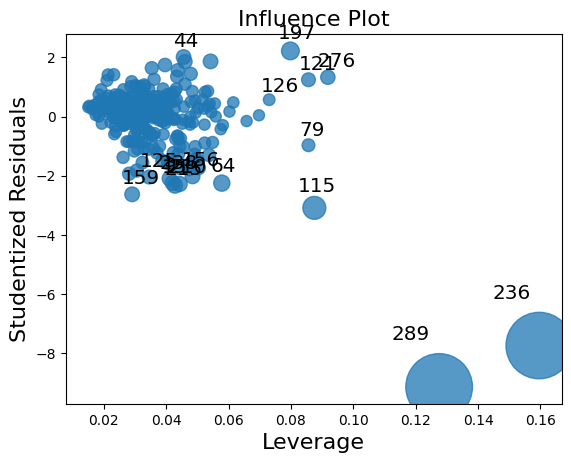

In [178]:
sm.graphics.influence_plot(result, criterion="cooks").show()

In the chart, we see 2 outliers with high leverage, which can result in poorer model performance, so we should delete them.

In [179]:
# get index of values less than -6 in standarized_residuals
mask = standarized_residuals < -6
X = X[~mask]
Y = dataframe['wydatki_zyw'][~mask]

First step to improve our model was removig high-leverage outliers

In [180]:
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wydatki_zyw   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.35e-102
Time:                        21:45:55   Log-Likelihood:                -1386.8
No. Observations:                 302   AIC:                             2796.
Df Residuals:                     291   BIC:                             2837.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          138.0236     67.382      2.048      0.041       5.406     270.641
waga            -0.1678      0.558     -0.301      0.764      -1.265       0.930
wzrost           0.1006      0.304      0.331      0.741      -0.498       0.699
plec             3.9389      4.559      0.864      0.388      -5.034      12.912
dzieci           1.9010      1.060      1.793      0.074      -0.185       3.987
wiek            -0.3459      0.226     -1.529      0.127      -0.791       0.099
dochod           0.2322      0.007     33.085      0.000       0.218       0.246
oszczednosci    -0.2362      0.007    -32.950      0.000      -0.250      -0.222
jednoos         -4.8730      4.474     -1.089      0.277     -13.678       3.932
miejsce_2       -2.7160      3.438     -0.790      0.430      -9.483       4.051
miejsce_3       -0.4362      3.836     -0.114      0.910      -7.986       7.113
==============================================================================
Omnibus:                      140.313   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.225
Skew:                          -1.936   Prob(JB):                    9.60e-145
Kurtosis:                       9.141   Cond. No.                     8.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next step will be manually removing least signiffiacnt variables, following backward selecting principle. We can see that $R^2$ dropped only by 0.002 and we get rid of 5 variables (one was categorical and decoded into dummies)

In [181]:
X2 = X.drop(columns=['miejsce_3', 'waga', 'wzrost', 'miejsce_2', 'jednoos', 'plec']).copy(deep=True)
model = sm.OLS(Y, X2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wydatki_zyw   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     335.8
Date:                Sun, 12 May 2024   Prob (F-statistic):          7.54e-109
Time:                        21:45:55   Log-Likelihood:                -1388.9
No. Observations:                 302   AIC:                             2788.
Df Residuals:                     297   BIC:                             2806.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          146.6162     12.910     11.357      0.000     121.209     172.023
dzieci           2.0579      1.045      1.970      0.050       0.002       4.114
wiek            -0.4153      0.210     -1.980      0.049      -0.828      -0.002
dochod           0.2326      0.007     33.576      0.000       0.219       0.246
oszczednosci    -0.2397      0.007    -36.447      0.000      -0.253      -0.227
==============================================================================
Omnibus:                      141.926   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.323
Skew:                          -1.965   Prob(JB):                    4.55e-146
Kurtosis:                       9.144   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we are going to add polynomial expressions to our model

In [182]:
X2['dochod_squared'] = X2['dochod'] ** 2
X2['oszczednosci_squared'] = X2['oszczednosci'] ** 2
X2['dochod_oszczednosci'] = X2['dochod'] * X2['oszczednosci']
model = sm.OLS(Y, X2)
result = model.fit()
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wydatki_zyw   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.633e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:45:55   Log-Likelihood:                -559.41
No. Observations:                 302   AIC:                             1135.
Df Residuals:                     294   BIC:                             1164.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   34.6832      1.167     29.731      0.000      32.387      36.979
dzieci                   1.5617      0.068     23.056      0.000       1.428       1.695
wiek                    -0.3104      0.014    -22.934      0.000      -0.337      -0.284
dochod                   0.7002      0.002    317.560      0.000       0.696       0.705
oszczednosci            -0.7001      0.002   -346.326      0.000      -0.704      -0.696
dochod_squared          -0.0004    1.8e-06   -250.342      0.000      -0.000      -0.000
oszczednosci_squared    -0.0004    1.7e-06   -264.526      0.000      -0.000      -0.000
dochod_oszczednosci      0.0009   3.47e-06    259.005      0.000       0.001       0.001
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.095
Skew:                           0.099   Prob(JB):                        0.351
Kurtosis:                       3.357   Cond. No.                     5.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding those polynomial expressions improved our $R^2$ drastically, we can also observe that p-values related with 'dzieci' and 'wiek' had greatly reduced.

In [183]:
standarized_residuals = result.resid / np.std(result.resid)
px.histogram(standarized_residuals, title='Histogram of standarized residuals', height=800, nbins=30).show()
print(shapiro(standarized_residuals))

ShapiroResult(statistic=0.9927926803169037, pvalue=0.153666464535422)


Now distribution of residuals look like it is normal

In [184]:
fitted_values = result.fittedvalues
residuals = result.resid
px.scatter(y=residuals, x=fitted_values, trendline='ols', title="Residuals vs. fitted values").show()
print(sm.stats.diagnostic.linear_reset(result, power=3, test_type='fitted'))

<Wald test (chi2): statistic=7.145207939885459, p-value=0.02808263205843019, df_denom=2>


Even though p-value for Ramsay RESET test isn't very hight we wouldn't reject $H_0 : X \beta + \epsilon$, it is also worth remebering that with increasing number of observations RESET test tend reject null hypothesis

In [185]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(standarized_residuals))
px.scatter(y=model_norm_residuals_abs_sqrt, x=fitted_values, title="Scale-Location", trendline='lowess', trendline_color_override="red").show()


As the line is staright we can assume that the variance is constant, and thus the data is homoscedastic.

In [186]:
indexes = np.linspace(1, len(standarized_residuals), len(standarized_residuals))
indexes = indexes.astype(int)
px.line(x=indexes, y=standarized_residuals, title='Standardized residuals over the observation number').add_hline(y=0, line_dash='dash', line_color='red')

The chart shows a slight fluctuation in the trend, which may indicate a slight autocorrelation, but this is not a serious problem

/tmp/ipykernel_2243593/3951251135.py:1: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



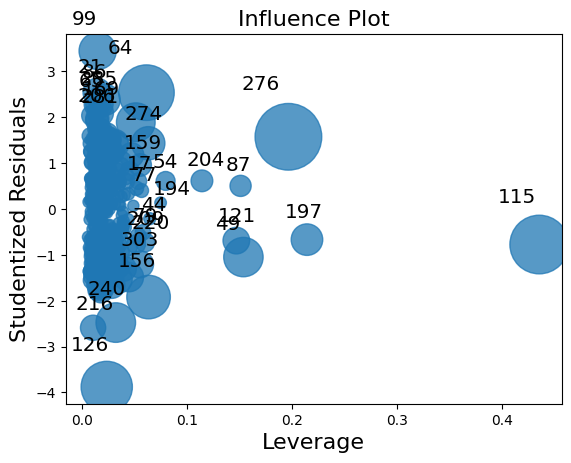

In [187]:
sm.graphics.influence_plot(result, criterion="cooks").show()

There are some outliers, but with insignificant leverage and there is a point with remarkably high leverage but with insignificant residuals. It is not necessary to remove it.

## Ex. 7.7
coefficients for 'dochod' and 'oszczednosci' are 0.7002 and -0.7001 respectively. The coefficients of 'dochod' and 'oszczednosci' represent the change in the dependent variable for a one unit change in the respective independent variables, assuming all other variables are held constant.

'dochod' coefficient (0.7002): This suggests that for every unit increase in 'dochod', the dependent variable increases by 0.7002 units, assuming all other variables are held constant. This indicates a positive relationship between 'dochod' and the dependent variable.

'oszczednosci' coefficient (-0.7001): This suggests that for every unit increase in 'oszczednosci', the dependent variable decreases by 0.7001 units, assuming all other variables are held constant. This indicates a negative relationship between 'oszczednosci' and the dependent variable.

In [188]:
# make the mask for upper 0.9 quantile of predicted values
mask = fitted_values >= fitted_values.quantile(0.9)
mask
top10 = X2[mask]
X2['is_top_10'] = mask.astype(int)
# make boxplot of 'dochod' for 'rodzynki' and X2
px.box(X2, y='dochod', x="is_top_10", title='Boxplot of dochod for two groups',  points='all', height=800).show()

Interestingly, there is no significant difference between two groups in terms of 'dochod'

In [192]:
px.box(X2, y='oszczednosci', x="is_top_10", title='Boxplot of oszczednosci for two groups',  points='all', height=800).show()


For oszczednosci, we can see that median is lower for the top 10% group

In [193]:
px.box(X2, y='wiek', x="is_top_10", title='Boxplot of wiek for two groups',  points='all', height=800).show()
print(ttest_ind(X2[X2['is_top_10'] == 0]['wiek'], X2[X2['is_top_10'] == 1]['wiek']))

TtestResult(statistic=3.6707685489594475, pvalue=0.0002861669631067824, df=300.0)


There is significant difference in age between two groups. People with higher predicted expenses are younger.

In [191]:

print(X[mask].describe())
print("--------------------------------------------------")
print(X.describe())


       const       waga      wzrost       plec     dzieci       wiek  \
count   31.0  31.000000   31.000000  31.000000  31.000000  31.000000   
mean     1.0  81.177742  173.929355   0.645161   2.774194  52.129032   
std      0.0   2.242382    6.121821   0.486373   1.359158   5.475655   
min      1.0  77.560000  159.970000   0.000000   0.000000  42.000000   
25%      1.0  79.735000  170.785000   0.000000   2.000000  47.500000   
50%      1.0  80.570000  174.570000   1.000000   3.000000  54.000000   
75%      1.0  82.210000  178.075000   1.000000   4.000000  56.000000   
max      1.0  86.060000  182.830000   1.000000   5.000000  60.000000   

            dochod  oszczednosci    jednoos  miejsce_2  miejsce_3  
count    31.000000     31.000000  31.000000  31.000000  31.000000  
mean   1526.131935    758.842903   0.322581   0.419355   0.354839  
std     960.944547    965.777979   0.475191   0.501610   0.486373  
min     753.680000    -95.950000   0.000000   0.000000   0.000000  
25%     883

in the group achieving the highest predictions, the percentage of men was noticeably higher, also the standard deviation for the variables 'income' and 'savings' was higher